<html>
<body>
<h1 align='center'>Classification</h1>
</body>
</html>

<html>
<body>
<h2 align='center'>Iris Flower Classification</h2>
</body>
</html>

<html>
<body>
<h4>Import Packages</h4>
</body>
</html>

In [5]:
# Make plots appear inside the notebook
%matplotlib inline

# Numpy: fast matrix multiplication
import numpy as np

# Matplotlib: plot data nicely
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Scikit-learn: Utilities
from sklearn import datasets
from sklearn import cross_validation

# Scikit-learn: Supervised Learning Models
from sklearn.tree import DecisionTreeClassifier

<html>
<body>
<h4>Load data</h4>
</body>
</html>

In [6]:
# load the iris datasets
iris = datasets.load_iris()
attributes = iris.feature_names
for f in attributes:
    print(f)

# Select subset of data
X = iris.data[:, 2:4]
y = iris.target

sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


<html>
<body>
<h4>Plot data</h4>
</body>
</html>

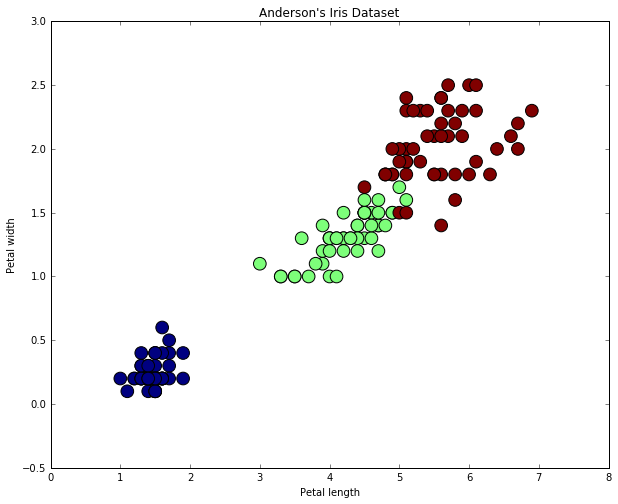

In [7]:
# set up plotting
plt.figure(figsize=(10, 8))
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Anderson's Iris Dataset")

# Plot iris dataset
plt.scatter(X[:,0], X[:,1], c=y, s=160)
plt.show()

<html>
<body>
<h4>Learn Decision Tree - Cross Validation </h4>
</body>
</html>

In [8]:
# Evaluate using Cross Validation
myTree = DecisionTreeClassifier()
scores = cross_validation.cross_val_score(myTree, X, y, cv=5)

print("Scores:", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores: [ 0.96666667  0.96666667  0.9         0.96666667  1.        ]
Accuracy: 0.96 (+/- 0.07)


<html>
<body>
<h2 align='center'>Handwritten Digit Recognition</h2>
</body>
</html>

<html>
<body>
<h4>Import Packages</h4>
</body>
</html>

In [9]:
# Make plots appear inside the notebook
%matplotlib inline

# Numpy: fast matrix multiplication
import numpy as np

# Matplotlib: plot data nicely
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Scikit-learn: Utilities
from sklearn import datasets
from sklearn import cross_validation

# Scikit-learn: Supervised Learning Models
# TODO: add models to import

<html>
<body>
<h4>Load Data</h4>
</body>
</html>

In [3]:
# TODO

<html>
<body>
<h4>Train and Evaluate Decision Trees Model</h4>
</body>
</html>

In [1]:
#TODO

<html>
<body>
<h4>Train and Evaluate Random Forests</h4>
</body>
</html>

In [2]:
#TODO

<html>
<body>
<h1 align='center'>Regression</h1>
</body>
</html>

<html>
<body>
<h2 align='center'>Advertisement & Sales</h2>
</body>
</html>

Dataset provided by Chapter 3 of "An Introduction to Statistical Learning"   
(Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani)  
Code adapted from github.com/justmarkham/DAT4

<html>
<body>
<h4>Import Packages</h4>
</body>
</html>

In [10]:
# Make plots appear inside the notebook
%matplotlib inline

# Numpy: fast matrix multiplication
import numpy as np

# Matplotlib: plot data nicely
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Scikit-Learn: Utilities
from sklearn import datasets
import pandas as pd

# Scikit-Learn: Regression models
from sklearn import linear_model

<html>
<body>
<h4>Load Dataset</h4>
</body>
</html>

In [14]:
# Load advertisement/Sales Dataset
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<html>
<body>
<h4>Visualize Data</h4>
</body>
</html>

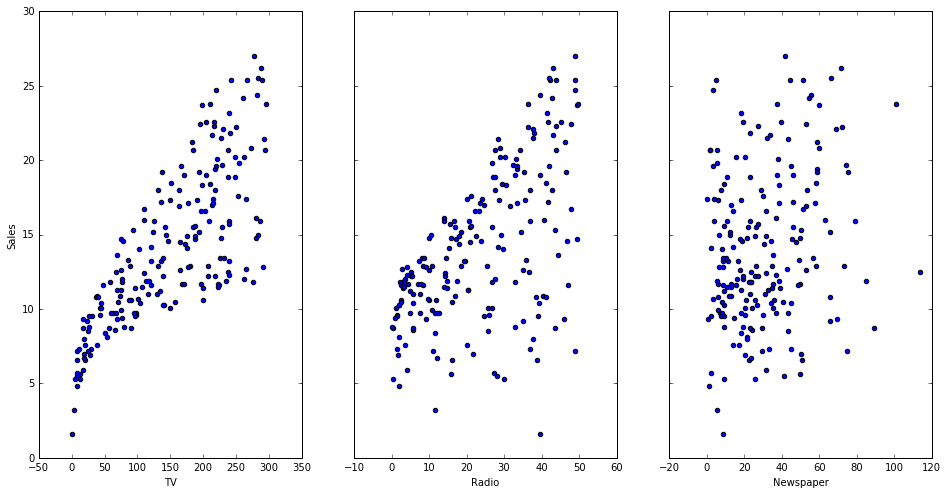

In [15]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

<html>
<body>
<h4>Univariate Linear Regression</h4>
</body>
</html>

Mean Squared Error (Train): 9.77
Mean Squared Error (Test): 13.17


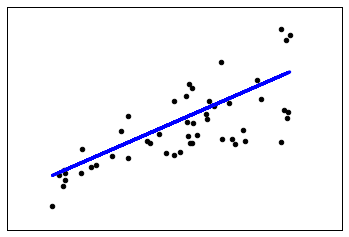

In [36]:
# Shuffle Data
data.reindex(np.random.permutation(data.index))

# Train test split
tv_train = list(data.iloc[range(0,150)].TV.reshape(-1, 1))
sales_train = list(data.iloc[range(0,150)].Sales.reshape(-1, 1))
tv_test = list(data.iloc[range(150,200)].TV.reshape(-1, 1))
sales_test = list(data.iloc[range(150,200)].Sales.reshape(-1, 1))

# Train the model using the training sets
regr = linear_model.LinearRegression()
regr.fit(tv_train, sales_train)

# Evaluate
print("Mean Squared Error (Train): %.2f" % np.mean((regr.predict(tv_train) - sales_train) ** 2))
print("Mean Squared Error (Test): %.2f" % np.mean((regr.predict(tv_test) - sales_test) ** 2))

# Plot Test set
plt.scatter(tv_test, sales_test,  color='black')
plt.plot(tv_test, regr.predict(tv_test), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

<html>
<body>
<h4>Non Linear Regression (Ads/Sales)</h4>
</body>
</html>

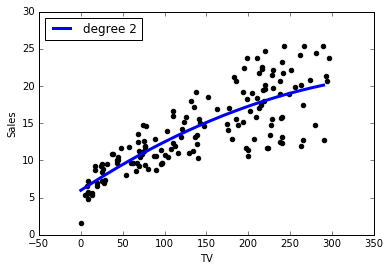

In [64]:
# Import additional utility functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Train and plot non linear regression model
for degree in [2]: #16
    model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
    model.fit(tv_train, sales_train)

    x_plot = np.linspace(0, 290, 350).reshape(-1, 1) 
    sales_pred = model.predict(x_plot)
    plt.scatter(tv_train, sales_train,  color='black')
    plt.plot(x_plot, sales_pred, label="degree %d" % degree, linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('TV')
plt.ylabel('Sales')

<html>
<body>
<h4>Non Linear Regression (x*sin(x))</h4>
</body>
</html>

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# TODO

<html>
<body>
<h4>Non Linear Regression (Overfitting Noise)</h4>
</body>
</html>

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# TODO